<a href="https://colab.research.google.com/github/HumayraFerdous/Hybrid-Models/blob/master/CNN_Cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
cat_dog_train = np.where((y_train == 3) | (y_train == 5))[0]
cat_dog_test = np.where((y_test == 3) | (y_test == 5))[0]

In [4]:
x_train, y_train = x_train[cat_dog_train], y_train[cat_dog_train]
x_test, y_test = x_test[cat_dog_test], y_test[cat_dog_test]

In [5]:
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,977 (652.25 KB)

 Trainable params: 166,977 (652.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - accuracy: 0.5702 - loss: 0.6767 - val_accuracy: 0.6600 - val_loss: 0.6120
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.6720 - loss: 0.6016 - val_accuracy: 0.7150 - val_loss: 0.5679
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7119 - loss: 0.5642 - val_accuracy: 0.7210 - val_loss: 0.5452
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.7338 - loss: 0.5362 - val_accuracy: 0.7290 - val_loss: 0.5238
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7552 - loss: 0.5051 - val_accuracy: 0.7330 - val_loss: 0.5277


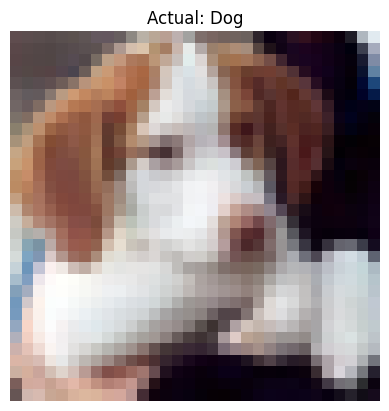

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted: Dog (Confidence: 0.67)


In [12]:
idx = 3
plt.imshow(x_test[idx])
plt.title("Actual: " + ("Dog" if y_test[idx] else "Cat"))
plt.axis('off')
plt.show()

pred = model.predict(x_test[idx:idx+1])[0][0]
print("Predicted:", "Dog" if pred > 0.5 else "Cat", f"(Confidence: {pred:.2f})")